# International football results from 1872 to 2019

## Context

Well, what happened was that I was looking for a semi-definite easy-to-read list of international football matches and couldn't find anything decent. So I took it upon myself to collect it for my own use. I might as well share it.

## Content

This dataset includes 40,838 results of international football matches starting from the very first official match in 1972 up to 2019. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

'results.csv' includes the following columns:

1. date - date of the match
2. home_team - the name of the home team
3. away_team - the name of the away team
4. home_score - full-time home team score including extra time, not including penalty-shootouts
5. away_score - full-time away team score including extra time, not including penalty-shootouts
6. tournament - the name of the tournament
7. city - the name of the city/town/administrative unit where the match was played
8. country - the name of the country where the match was played
9. neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue


Note on team and country names: For home and away teams the current name of the team has been used. For example, when in 1882 a team who called themselves Ireland played against England, in this dataset, it is called Northern Ireland because the current team of Northern Ireland is the successor of the 1882 Ireland team. This is done so it is easier to track the history and statistics of teams.

For country names, the name of the country at the time of the match is used. So when Ghana played in Accra, Gold Coast in the 1950s, even though the names of the home team and the country don't match, it was a home match for Ghana. This is indicated by the neutral column, which says FALSE for those matches, meaning it was not at a neutral venue.

## Acknowledgements

The data is gathered from several sources including but not limited to Wikipedia, fifa.com, rsssf.com and individual football associations' websites.

## Inspiration

Some directions to take when exploring the data:

1. Who is the best team of all time
2. Which teams dominated different eras of football
3. What trends have there been in international football throughout the ages - home advantage, total goals scored, distribution of teams' strength etc
4. Can we say anything about geopolitics from football fixtures - how has the number of countries changed, which teams like to play each other
5. Which countries host the most matches where they themselves are not participating in
6. How much, if at all, does hosting a major tournament help a country's chances in the tournament
7. Which teams are the most active in playing friendlies and friendly tournaments - does it help or hurt them

The world's your oyster, my friend.

# Stage 1 - Import the Dataset and Libraries:

## Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset:

In [2]:
path_directory = '/Users/y.s.lee/OneDrive/MSc Data Science/Semester 3/Data VIsualisation NEW (COMP5048)/Assignments/Assignment 2/Data/'

data_football = pd.read_csv(path_directory + 'results.csv')

# Stage 2 - Review the Dataset:

In [3]:
data_football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
data_football.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [5]:
data_football.shape

(40839, 9)

In [6]:
data_football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


# Stage 3 - Clean the Dataset:

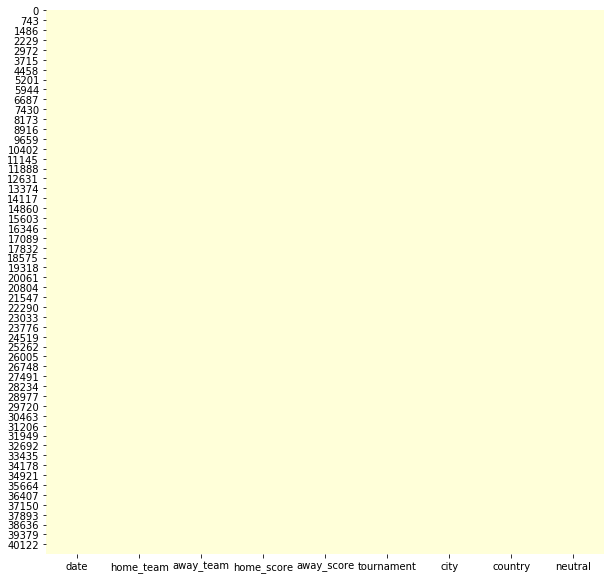

In [7]:
# Visualise it:

plt.figure(figsize=(10,10))
sns.heatmap(data_football.isnull(), cbar = False, cmap = "YlGnBu")

From the figure above, it seems like the dataset is complete and does not have missing data.

# Task 1 Analysis - Understand ranking of teams based on results from various competitions

For this task, the idea is to determine the outcome of each matches between the home and away teams, where the wining team will gain a score in points towards their ranking. The cumulative frequency of wining matches by each team will then determine its position on a ranking (leadership) board. The scores can be taken as three categories, winning the match, losing the match, and having a draw. However, this ranking/leadership board is non-conventional as it only takes into accounts of wining scores from matches played by each team. The ranking board should convey which teams has accumulated the most wins over time.


## THE FOLLOWING IS BASED AROUND THE 'HOME TEAM'

## Create a new column for the scores of each matches:

In [8]:
data_football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [9]:
col_list = ['home_score', 'away_score']

data_football['home_score'].sub(data_football['away_score']).tail()

40834    7
40835    0
40836   -1
40837   -1
40838    0
dtype: int64

In [10]:
data_football['match_scores'] = data_football['home_score'].sub(data_football['away_score'])

In [11]:
data_football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_scores
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


## Create a column for the Match Winner:

In [12]:
len(data_football)

40839

In [24]:
data_football['winning_team'] = np.nan

list_teamOutcomes = []

for idx in range(len(data_football)):
    print(idx)
    if (data_football['home_score'][idx] > data_football['away_score'][idx]):
        print('home')
        list_teamOutcomes.append('home')

    elif (data_football['home_score'][idx] < data_football['away_score'][idx]):
        print('away')
        list_teamOutcomes.append('away')

    else:
        print('draw')
        list_teamOutcomes.append('draw')

data_football['winning_team'] = list_teamOutcomes

0
draw
1
home
2
home
3
draw
4
home
5
home
6
away
7
away
8
home
9
home
10
home
11
home
12
away
13
home
14
away
15
home
16
away
17
away
18
away
19
away
20
home
21
home
22
home
23
home
24
home
25
home
26
away
27
away
28
draw
29
away
30
home
31
away
32
home
33
away
34
home
35
home
36
draw
37
home
38
draw
39
away
40
away
41
away
42
home
43
away
44
away
45
draw
46
away
47
home
48
home
49
home
50
home
51
home
52
home
53
away
54
away
55
home
56
home
57
home
58
away
59
away
60
away
61
home
62
home
63
home
64
home
65
away
66
draw
67
away
68
home
69
away
70
away
71
home
72
away
73
draw
74
home
75
home
76
home
77
away
78
home
79
draw
80
away
81
away
82
away
83
home
84
away
85
home
86
home
87
away
88
home
89
home
90
home
91
draw
92
away
93
home
94
away
95
draw
96
home
97
draw
98
draw
99
draw
100
home
101
home
102
home
103
away
104
away
105
home
106
draw
107
home
108
home
109
home
110
draw
111
home
112
home
113
away
114
away
115
away
116
home
117
away
118
away
119
away
120
home
121
home
122
away
123

In [25]:
data_football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_scores,winning_team
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,home
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,home
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,home


In [26]:
data_football.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_scores,winning_team
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,7,home
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,0,draw
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,-1,away
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,-1,away
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True,0,draw


## Checkout the performance of the Teams:

In [28]:
data_football.groupby('winning_team').sum()

,home_score,away_score,neutral,match_scores
winning_team,,,,
away,6588,29772,3458.0,-23184
draw,8512,8512,2318.0,0
home,56193,10237,4383.0,45956


In [31]:
# Create a subset of the data:

data_football_grouped = data_football.groupby('home_team').sum().reset_index()
data_football_grouped

,home_team,home_score,away_score,neutral,match_scores
0,Abkhazia,36,11,12.0,25
1,Afghanistan,49,59,31.0,-10
2,Albania,189,196,20.0,-7
3,Alderney,5,27,7.0,-22
4,Algeria,508,247,103.0,261
5,American Samoa,24,140,24.0,-116
6,Andalusia,23,13,0.0,10
7,Andorra,26,176,19.0,-150
8,Angola,241,143,48.0,98
9,Anguilla,12,40,6.0,-28


In [33]:
data_football_grouped.sort_values('match_scores', ascending=False)

,home_team,home_score,away_score,neutral,match_scores
35,Brazil,1396,466,228.0,930
12,Argentina,1200,476,212.0,724
104,Germany,1231,512,91.0,719
85,England,1123,438,52.0,685
253,South Korea,921,342,165.0,579
261,Sweden,1129,554,37.0,575
256,Spain,828,267,53.0,561
173,Mexico,1018,460,246.0,558
185,Netherlands,974,427,48.0,547
134,Italy,875,349,77.0,526
